
<img style="float: right;" src="data/logo.png" width= "200" height = "200">

# EART23202: Interpreting the Stratigraphic Record

### Exploring geological data with Python

You have been in to the field and measured a conformable section of sedimentary rocks in the Peak District (the Manchester Formation and the Liverpool Formation). 

You have collected:

* Bed thickness data 
* Grain size data
* Paleocurrent data
* Structural data

You have also collected oxygen isotope data that someone else measured from a section of the same age last year (Bloggs et al. 2020). They only reported the data, and did not document the geology in detail.
#### You are now dry and back at home, and you want to:
* 1) inspect the data
* 2) plot the data
* 3) interpret the data

### 1) Inspect the data 
first we import the packages that we are going to use:

In [14]:
import numpy as np ## numbers
import pandas as pd ## tables
import matplotlib.pyplot as plt ## plotting
import seaborn as sns ## plotting
from scipy import stats ## statistics

%config InlineBackend.figure_formats = ['svg'] ## displaying data

then we load the data using one of those packages - Pandas (like Excel for Python):

In [15]:
log = pd.read_excel('data/data.xlsx')

now we want to check the data is loaded correctly:

In [16]:
log.head()

,Unnamed: 0,height,bed_number,bed_thickness,grainsize,paleocurrent,strike,dip,formation,d18O
0,0,0.83,1.00,2.60,0,309,NaN,NaN,Liverpool Formation,0.09
1,1,0.75,2.01,2.88,0,310,256.0,42.0,Liverpool Formation,0.25
2,2,9.82,3.02,3.36,0,296,NaN,NaN,Liverpool Formation,0.16
3,3,12.75,4.03,3.37,0,292,232.0,38.0,Liverpool Formation,0.21
4,4,20.16,5.04,0.08,0,287,NaN,NaN,Liverpool Formation,0.19


### 2) Plot the data

 Lets check how the bed thickness & grain size changes with height

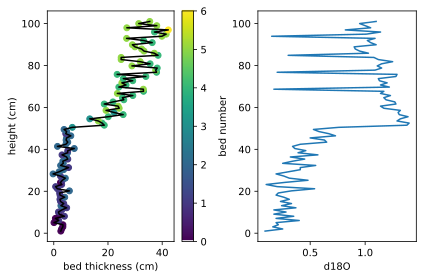

In [17]:
fig, ax = plt.subplots(ncols = 2)

ax[0].plot(log.bed_thickness, log.bed_number, 'k')
cax = ax[0].scatter(log.bed_thickness, log.bed_number, c = log.grainsize)
plt.colorbar(cax, ax = ax[0])

ax[1].plot(log.d18O, log.bed_number)

ax[0].set(xlabel = 'bed thickness (cm)', ylabel = 'height (cm)')
ax[1].set(xlabel = 'd18O', ylabel = 'bed number')

plt.tight_layout()

# plt.savefig('field.jpg', dpi = 300)

Interetsting...lets check if each formation is different

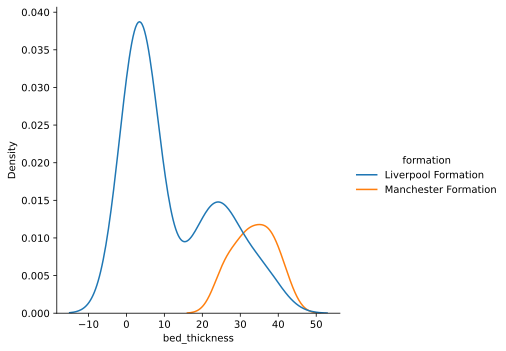

In [21]:
sns.displot(kind = 'kde', data = log, x = log.bed_thickness, hue = log.formation)

It looks like they are...can we be more confident?

### 3) Statistics

Lets split the data into formations

In [22]:
manchester = log[log['formation'] == 'Manchester Formation'] 
liverpool = log[log['formation'] == 'Liverpool Formation'] 

In [24]:
stats.kstest(manchester.bed_thickness, liverpool.bed_thickness)

KstestResult(statistic=0.8, pvalue=7.602396490113961e-11)